# Pipeline for the anomaly detection on the SKAB using Convolutional Autoencoder

Details regarding the SKAB one can find in the [SKAB repository](https://github.com/waico/SKAB).

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# 'pip install tsad' if needed
!pip install tsad
from tsad.utils.evaluating.evaluating import evaluating

%matplotlib inline

# additional modules
import sys
sys.path.append('/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/Conv_AE_modules')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data

Put the `data` folder from the SKAB repository in the root of this repository. So the path will be following: `../data/`. Or select your own path.

In [158]:
path_to_data = '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/'

## Data loading

In [159]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))
print(all_files)

['/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/15.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/13.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/19.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/23.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/21.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/18.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/14.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/12.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/17.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/20.csv', '/content/drive/MyDrive/All_Projects/MLOps/mlops-final-project-main/SKAB/other/9.csv', '/content/drive/MyDrive/All_Proj

In [160]:

# --- Conv_AE Modified code : Using the same dataset as ligthGBM

# module import
warnings.filterwarnings('ignore')

#loading the dataset
all_files=[]
for dirname,_,filenames in os.walk(path_to_data):
    for filename in filenames:
        if filename.endswith('csv'):
            all_files.append(f'{dirname}/{filename}')
all_files.sort()

valve1_dat={file.split('/')[-1]:pd.read_csv(file,sep=';',index_col='datetime',parse_dates=True)
              for file in all_files if 'valve1' in file}

#concatenate data(order in time series by sort_index)
valve1_data=pd.concat(list(valve1_dat.values()),axis=0).sort_index()

list_of_df = [valve1_data] # Contained the single combined dataset of valve1_data folder
display(valve1_data)


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 10:14:33,0.026588,0.040111,1.330200,0.054711,79.3366,26.0199,233.062,32.0000,0.0,0.0
2020-03-09 10:14:34,0.026170,0.040452,1.353990,0.382638,79.5158,26.0258,236.040,32.0000,0.0,0.0
2020-03-09 10:14:35,0.026199,0.039419,1.540060,0.710565,79.3756,26.0265,251.380,32.0000,0.0,0.0
2020-03-09 10:14:36,0.026027,0.039641,1.334580,0.382638,79.6097,26.0393,234.392,32.0000,0.0,0.0
2020-03-09 10:14:37,0.026290,0.040273,1.078510,-0.273216,79.6109,26.0420,225.342,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 15:34:37,0.027605,0.039760,0.622996,0.382638,68.4247,24.4370,230.358,32.9673,0.0,0.0
2020-03-09 15:34:38,0.027286,0.039613,0.600692,0.054711,68.0598,24.4356,231.373,32.0000,0.0,0.0
2020-03-09 15:34:39,0.027202,0.041440,0.450323,0.054711,68.1836,24.4379,210.605,32.0337,0.0,0.0


### Data description

In [161]:
# dataset characteristics printing
print('SKAB v0.9')
print(f'- A number of datasets: {len(list_of_df)}')
print(f'- Shape of the random dataset: {list_of_df[0].shape}')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'- A number of changepoints: {n_cp}')
print(f'- A number of outliers (point anomalies): {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[0].head(1))

SKAB v0.9
- A number of datasets: 1
- Shape of the random dataset: (18162, 10)
- A number of changepoints: 63
- A number of outliers (point anomalies): 6309

Head of the random dataset:


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 10:14:33,0.026588,0.040111,1.3302,0.054711,79.3366,26.0199,233.062,32.0,0.0,0.0


### Data visualization

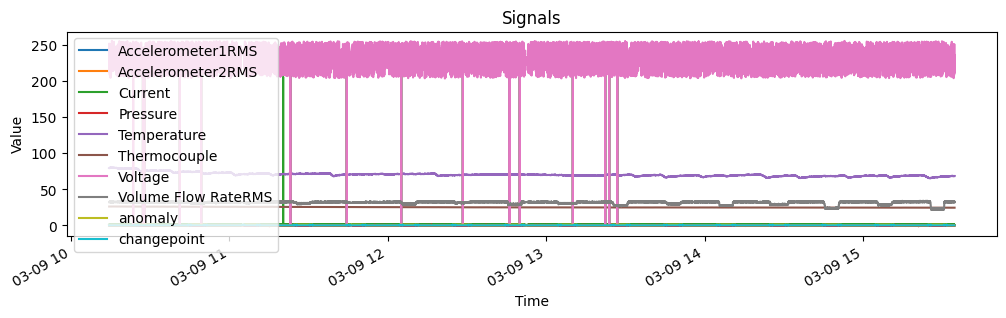

In [162]:
# random dataset visualizing
list_of_df[0].plot(figsize=(12, 3))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

### Labels visualization

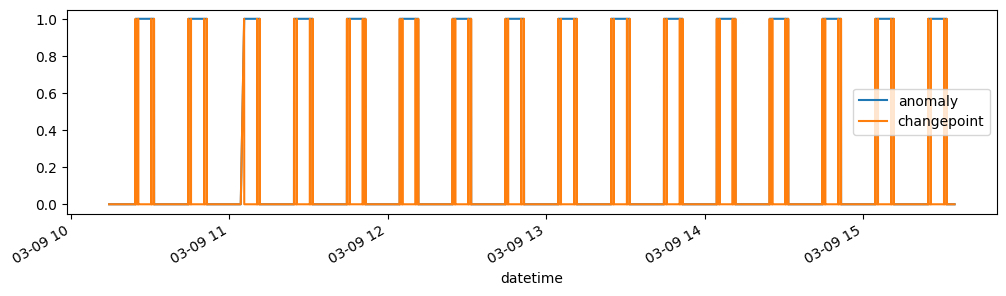

In [163]:
# plotting the labels both for outlier and changepoint detection problems
list_of_df[0].anomaly.plot(figsize=(12, 3))
list_of_df[0].changepoint.plot()
plt.legend()
plt.show()

## Method

### Method initialization

In [164]:
from Conv_AE import Conv_AE
import numpy as np
from sklearn.preprocessing import StandardScaler

In [165]:
# hyperparameters selection
N_STEPS = 60
Q = 0.999 # quantile for upper control limit (UCL) selection

In [166]:
# model defining
model = Conv_AE()

In [167]:
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=N_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

### Method fitting and applying

In [168]:
%%time
# inference
predicted_outlier, predicted_cp = [], []


for df in list_of_df:
    train_pre_size = df.shape[0]
    train_size=int(train_pre_size*0.7)
    valid_pre_size=train_pre_size-train_size
    valid_size=int(valid_pre_size*0.66)

    #X_train = df[:400].drop(['anomaly', 'changepoint'], axis=1)
    X_train_df = df[:train_size].drop(['anomaly', 'changepoint'], axis=1)
    X_valid_df = df[train_size:train_size+valid_size].drop(['anomaly', 'changepoint'], axis=1)
    X_test_df = df[train_size+valid_size:].drop(['anomaly', 'changepoint'], axis=1)

    # scaler init and fitting
    StSc = StandardScaler()
    StSc.fit(df.drop(['anomaly', 'changepoint'], axis=1))



    # convert into input/output
    X_train_seq = create_sequences(StSc.transform(X_train_df), N_STEPS)
    X_test_seq = create_sequences(StSc.transform(X_test_df), N_STEPS)
    X_valid_seq = create_sequences(StSc.transform(X_valid_df), N_STEPS)


    # model fitting
    model.fit(X_train_seq)

    # results predicting
    residuals = pd.Series(np.sum(np.mean(np.abs(X_valid_seq - model.predict(X_valid_seq)), axis=1), axis=1))
    UCL = residuals.quantile(Q) * 4/8   # 4/3

    # results predicting
    #X = create_sequences(StSc.transform(df.drop(['anomaly','changepoint'], axis=1)), N_STEPS)
    cnn_residuals = pd.Series(np.sum(np.mean(np.abs(X_valid_seq - model.predict(X_valid_seq)), axis=1), axis=1))

    # data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
    anomalous_data = cnn_residuals > UCL
    anomalous_data_indices = []
    for data_idx in range(N_STEPS - 1, len(X_valid_seq) - N_STEPS + 1):
        if np.all(anomalous_data[data_idx - N_STEPS + 1 : data_idx]):
            anomalous_data_indices.append(data_idx)

    prediction = pd.Series(data=0, index=X_valid_df.index)
    prediction.iloc[anomalous_data_indices] = 1

    # predicted outliers saving
    predicted_outlier.append(prediction)

    # predicted CPs saving
    prediction_cp = abs(prediction.diff())
    prediction_cp[0] = prediction[0]
    predicted_cp.append(prediction_cp)

111/111 [==============================] - 0s 4ms/step
CPU times: user 34.6 s, sys: 1.43 s, total: 36 s
Wall time: 28.4 s


# Validation set evaluation

### Results visualization

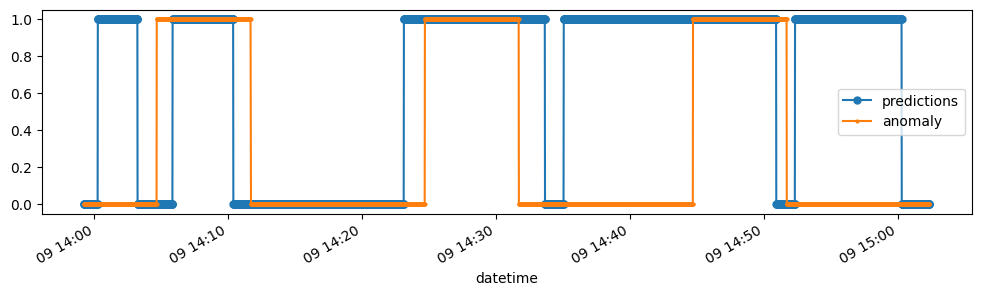

In [169]:
# true outlier indices selection
true_outlier = [df[train_size:train_size+valid_size:].anomaly for df in list_of_df]

predicted_outlier[0].plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
true_outlier[0].plot(marker='o', markersize=2)
plt.legend();

In [170]:
def perf_measure(y_actual, y_hat, y_len: int):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return((TP / y_len), (FP / y_len), (TN / y_len), (FN / y_len))

#fine-tunned hyper paramter
lgb_params={'objective':'binary',
            'metric':'binary_error',
            'force_row_wise':True,
            'seed':0,
            'learning_rate':0.0424127,
            'min_data_in_leaf':15,
            'max_depth':24,
            'num_leaves':29
           }

outlier_len = len(true_outlier)
true_outlier_np=np.concatenate([x.to_numpy() for x in true_outlier])
predicted_outlier_np=np.concatenate([x.to_numpy() for x in predicted_outlier])
tp_rate, fp_rate, tn_rate, fn_rate = perf_measure(true_outlier_np, predicted_outlier_np, outlier_len)

print('test_fn_count:' + str(fn_rate))
print('test_fn_rate:' + str(fn_rate/(fn_rate + tp_rate)))
print('test_recall_rate:' + str(tp_rate/(fn_rate + tp_rate)))
print('accuracy_rate:' + str((tp_rate+tn_rate)/(tp_rate+fp_rate+fn_rate+tn_rate)))

test_fn_count:186.0
test_fn_rate:0.15538847117794485
test_recall_rate:0.8446115288220551
accuracy_rate:0.5661846496106785


### Valid set evaluation : Binary classification (outlier detection) metrics

In [171]:
# binary classification metrics calculation
binary = evaluating(
    true_outlier,
    predicted_outlier,
    metric='binary'
)

False Alarm Rate 57.27 %
Missing Alarm Rate 15.54 %
F1 metric 0.56


# Test set evaluation

### Prediction

In [172]:
# results predicting
predicted_outlier = []
residuals = pd.Series(np.sum(np.mean(np.abs(X_test_seq - model.predict(X_test_seq)), axis=1), axis=1))
UCL = residuals.quantile(Q) * 4/8   # 4/3

# results predicting
#X = create_sequences(StSc.transform(df.drop(['anomaly','changepoint'], axis=1)), N_STEPS)
cnn_residuals = pd.Series(np.sum(np.mean(np.abs(X_test_seq - model.predict(X_test_seq)), axis=1), axis=1))

# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data = cnn_residuals > UCL
anomalous_data_indices = []
for data_idx in range(N_STEPS - 1, len(X_test_seq) - N_STEPS + 1):
    if np.all(anomalous_data[data_idx - N_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

prediction = pd.Series(data=0, index=X_test_df.index)
prediction.iloc[anomalous_data_indices] = 1

# predicted outliers saving
predicted_outlier.append(prediction)

57/57 [==============================] - 0s 4ms/step


### Results visualization

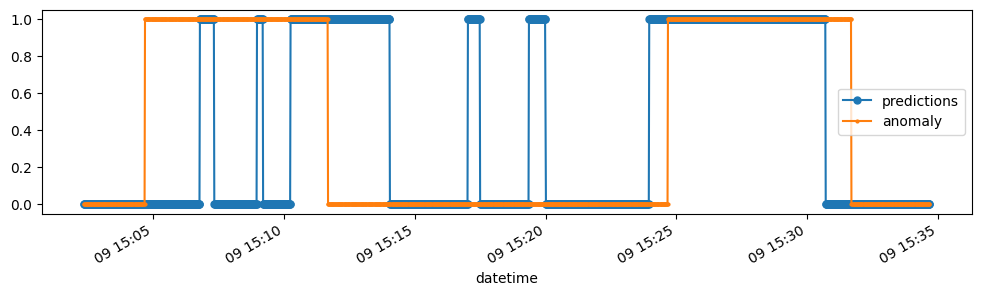

In [173]:
# true outlier indices selection
true_outlier = [df[train_size+valid_size:].anomaly for df in list_of_df]

predicted_outlier[0].plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
true_outlier[0].plot(marker='o', markersize=2)
plt.legend();

In [174]:
def perf_measure(y_actual, y_hat, y_len: int):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return((TP / y_len), (FP / y_len), (TN / y_len), (FN / y_len))

#fine-tunned hyper paramter
lgb_params={'objective':'binary',
            'metric':'binary_error',
            'force_row_wise':True,
            'seed':0,
            'learning_rate':0.0424127,
            'min_data_in_leaf':15,
            'max_depth':24,
            'num_leaves':29
           }

outlier_len = len(true_outlier)
true_outlier_np=np.concatenate([x.to_numpy() for x in true_outlier])
predicted_outlier_np=np.concatenate([x.to_numpy() for x in predicted_outlier])
tp_rate, fp_rate, tn_rate, fn_rate = perf_measure(true_outlier_np, predicted_outlier_np, outlier_len)

print('test_fn_count:' + str(fn_rate))
print('test_fn_rate:' + str(fn_rate/(fn_rate + tp_rate)))
print('test_recall_rate:' + str(tp_rate/(fn_rate + tp_rate)))
print('accuracy_rate:' + str((tp_rate+tn_rate)/(tp_rate+fp_rate+fn_rate+tn_rate)))

test_fn_count:331.0
test_fn_rate:0.4122042341220423
test_recall_rate:0.5877957658779577
accuracy_rate:0.6913113869400972


### Test set evaluation : Binary classification (outlier detection) metrics

In [175]:
# binary classification metrics calculation
binary = evaluating(
    true_outlier,
    predicted_outlier,
    metric='binary'
)

False Alarm Rate 22.95 %
Missing Alarm Rate 41.22 %
F1 metric 0.62


# Bad slices detection on test set

In [176]:
X_test_seq.shape # Test df seq

(1794, 60, 8)

In [177]:
X_test_df.shape # Test df

(1853, 8)

In [178]:
true_outlier[0].shape # True labels

(1853,)

In [179]:
predicted_outlier[0].shape # predicted labels

(1853,)